In [3]:
#TF (Term Frequency): The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

#IDF (Inverse Document Frequency): Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

#The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

In [4]:
import numpy as np
import pandas as pd
import itertools

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#Read the data
df=pd.read_csv('C:/Users/edgar/Desktop/Data Sets/news.csv')


#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [9]:
labels = df.label
labels

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [10]:
#Split the dataset

X = df.text
y = labels

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)


In [11]:
#Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) #df = document frequency

#Fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train) 
tfidf_test = tfidf_vectorizer.transform(x_test)

#make it readable for the machine, it extracts info.


In [12]:
#Initialize a PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(tfidf_train,y_train)#! fits the model based on its learned connections

#Predict on the test set and calculate accuracy
y_pred = model.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


<Axes: xlabel='label', ylabel='count'>

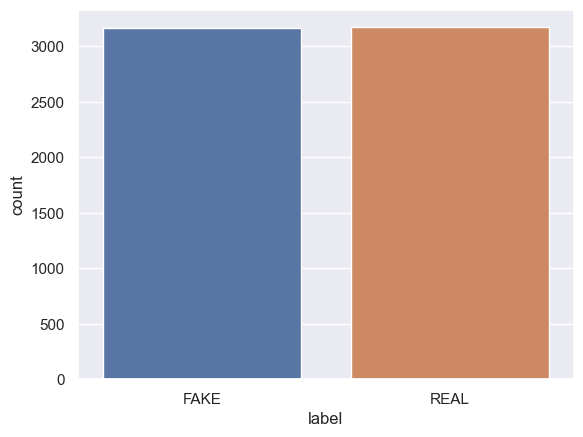

In [13]:
sns.set(style="darkgrid")
sns.countplot(x = "label" , data = df)

In [14]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
confusion_matrix(y_test, y_pred)

array([[589,  49],
       [ 43, 586]], dtype=int64)